<a href="https://colab.research.google.com/github/madhura2024/myAI_MODELS/blob/main/E_COMMERCEipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 0 - the basics


In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# seed random just set  random something
# np.random.seed(11)
# display all , dont hide columns
pd.set_option('display.max_columns', None)

step 1-import files

In [56]:
# for importing files write this------>
imported = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
imported.head(5000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
4995,536836,21843,RED RETROSPOT CAKE STAND,2,2010-12-02 18:08:00,10.95,18168.0,United Kingdom
4996,536836,21531,RED RETROSPOT SUGAR JAM BOWL,2,2010-12-02 18:08:00,2.55,18168.0,United Kingdom
4997,536836,21539,RED RETROSPOT BUTTER DISH,3,2010-12-02 18:08:00,4.95,18168.0,United Kingdom
4998,536836,22198,LARGE POPCORN HOLDER,2,2010-12-02 18:08:00,1.65,18168.0,United Kingdom


step 2-delete rows with incomplete data

In [57]:
# where customer id not present

imported=imported.dropna(subset=['CustomerID'])
# decription not present

imported=imported.dropna(subset=['Description'])

step 3-drop duplicates

In [58]:
imported=imported.drop_duplicates()

step 3-
*   change word----------->number
*   change names of products------------>number
*   change too high  /  too low to fit a scale







In [59]:
# this is labelencoder.this automatically gives 0/1 to names etc     (ordered)
imported = pd.get_dummies(imported, columns=['Country'], drop_first=True)


# this is onehotencoder so it has fit_transform ,, where every word will have unique non ordered numbers (001,011,010....)

# safety check again drop anything with null  or    string value !!!!!!!!!!!!!!!!!!!!!


imported = imported.dropna(subset=['Description'])
imported = pd.get_dummies(imported, columns=['Description'], drop_first=True)
imported=imported.dropna()

step 4-set divide train / test

In [60]:
y = imported.loc[:, 'UnitPrice']
x = imported.loc[:, imported.columns != 'UnitPrice']

#  had huge error here . always remember safety check dtype always check for number otherwise string error !!!!!!!!!!!!!!!!
x = x.select_dtypes(include=['number'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

step 5- linear regression

In [61]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

step 6- check accuracy of model

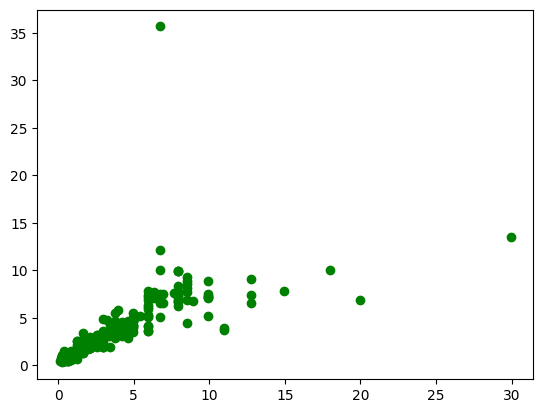

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()

step 7-random forest regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
imported['TotalPrice'] = imported['Quantity'] * imported['UnitPrice']
y = imported.loc[:, 'TotalPrice']
x = imported.loc[:, imported.columns != 'TotalPrice']
x = x.select_dtypes(include=['number'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

step 8-check rfr

In [64]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

step 9-check value

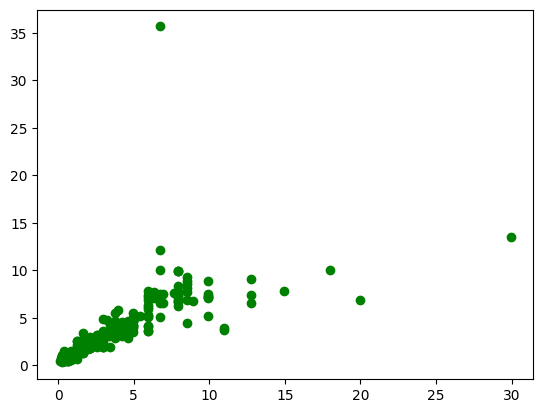

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
result=[]
result.append(["linear",r2])
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()

step 9-polynomial regressor(this is same as linear regression , just the degree is more)

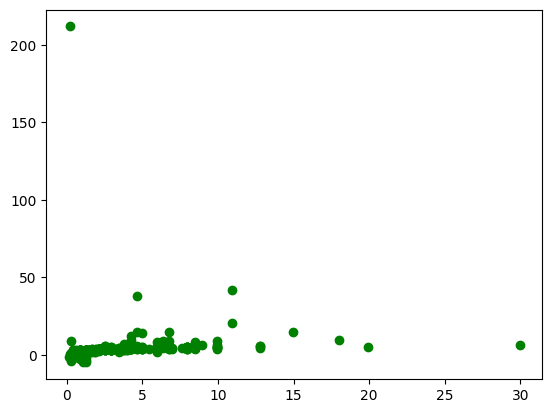

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# same thing still exists same as linear regression just change input type to polynomial

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# call

model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

# same output style

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
result.append(["polynomial",r2])
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()

step 10-decision tree algo

In [81]:
from sklearn.tree import DecisionTreeRegressor
y = imported.loc[:, 'UnitPrice']
x = imported.loc[:, imported.columns != 'UnitPrice']
x = x.select_dtypes(include=['number'])

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# call function
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

step 11-run decision

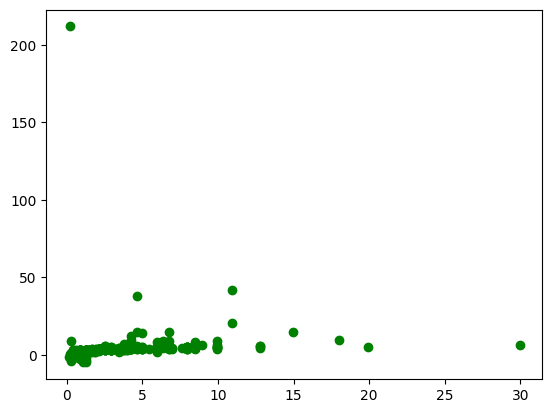

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
result.append(["decision Regression", r2])
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()

step 12-Lasso  (these are all same just some parts are a little different)

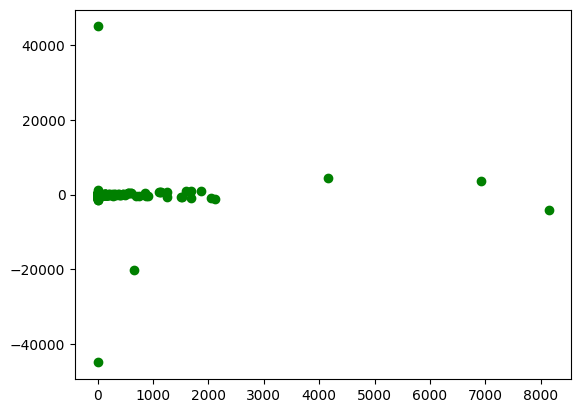

In [83]:
from sklearn.linear_model import Lasso
y = imported.loc[:, 'UnitPrice']
x = imported.loc[:, imported.columns != 'UnitPrice']
x = x.select_dtypes(include=['number'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)


# only this line is different


model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
result.append(["lasso Regression", r2])
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()

step 13-SVM (same too)

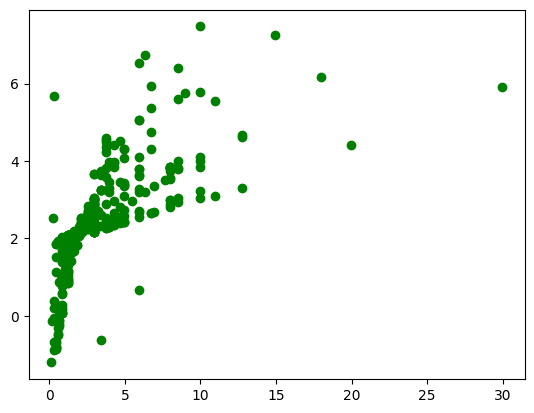

In [84]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


imported_small = imported.head(2000)

y = imported_small['UnitPrice']
x = imported_small.drop(columns=['UnitPrice'])
x = x.select_dtypes(include=['number'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = SVR()
model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
result.append(["svm Regression", r2])
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()

step 14-KNN

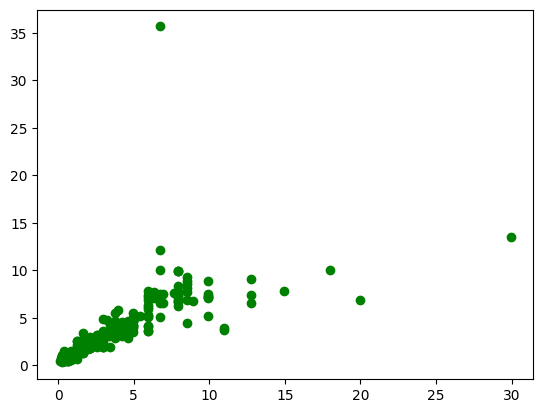

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

imported_small = imported.head(2000)


y = imported_small['UnitPrice']
x = imported_small.drop(columns=['UnitPrice'])
x = x.select_dtypes(include=['number'])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
result.append(["knn Regression",r2])
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()


# Step 1: Target column
y = df['UnitPrice']

# Step 2: Features
x = df.drop(columns=['UnitPrice']).select_dtypes(include=['number'])

# Step 3: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 4: Scale if needed
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 5: Initialize model
model = SomeRegressor()

# Step 6: Train
model.fit(x_train_scaled, y_train)  # or model.fit(x_train, y_train)

# Step 7: Predict
y_pred = model.predict(x_test_scaled)  # or model.predict(x_test)

# Step 8: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [75]:
finallist = pd.DataFrame(result, columns=["Model", "R² Score"])
print(finallist)

                 Model  R² Score
0               linear  1.000000
1  decision Regression  1.000000
2       svm Regression  0.359855
3       knn Regression  0.518996


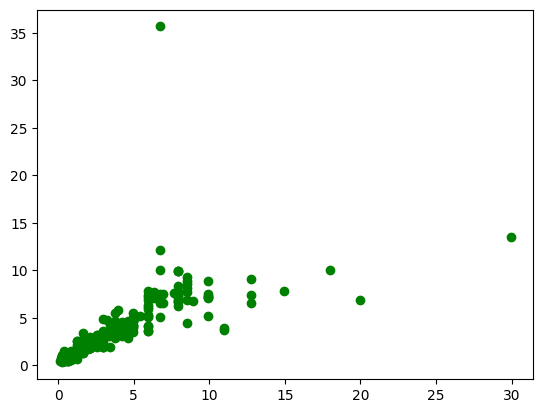

In [76]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='green')  # green dots
plt.show()
